In [ ]:
!pip install prince

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prince
from sklearn.cluster import KMeans
import plotly.express as px

In [ ]:
def elbow_method(data):
    sse = {}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=1000, init='k-means++').fit(data)
        
    
        sse[k] = kmeans.inertia_ 
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()

# Import Dataset

In [ ]:
from google.colab import files
files.upload()

Saving german_credit_data.csv to german_credit_data.csv


{'german_credit_data.csv': b',Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose\r\n0,67,male,2,own,NA,little,1169,6,radio/TV\r\n1,22,female,2,own,little,moderate,5951,48,radio/TV\r\n2,49,male,1,own,little,NA,2096,12,education\r\n3,45,male,2,free,little,little,7882,42,furniture/equipment\r\n4,53,male,2,free,little,little,4870,24,car\r\n5,35,male,1,free,NA,NA,9055,36,education\r\n6,53,male,2,own,quite rich,NA,2835,24,furniture/equipment\r\n7,35,male,3,rent,little,moderate,6948,36,car\r\n8,61,male,1,own,rich,NA,3059,12,radio/TV\r\n9,28,male,3,own,little,moderate,5234,30,car\r\n10,25,female,2,rent,little,moderate,1295,12,car\r\n11,24,female,2,rent,little,little,4308,48,business\r\n12,22,female,2,own,little,moderate,1567,12,radio/TV\r\n13,60,male,1,own,little,little,1199,24,car\r\n14,28,female,2,rent,little,little,1403,15,car\r\n15,32,female,1,own,moderate,little,1282,24,radio/TV\r\n16,53,male,2,own,NA,NA,2424,24,radio/TV\r\n17,25,male,2,own,NA,little,8072,

In [ ]:
df = pd.read_csv('german_credit_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [ ]:
numerical = ['Credit amount','Age','Duration']
categorical = ['Sex','Job','Housing','Saving accounts','Checking account','Purpose']
unused = ['Unnamed: 0']

df = df.drop(labels=unused, axis='columns')

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


# Missing values analysis

In [ ]:
df.isnull().sum(axis=0).reset_index()

,index,0
0,Age,0
1,Sex,0
2,Job,0
3,Housing,0
4,Saving accounts,183
5,Checking account,394
6,Credit amount,0
7,Duration,0
8,Purpose,0


In [ ]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode())

In [ ]:
df['Job']=df['Job'].astype(object)

# Exploratory Data Analysis

## Univariate Analysis

### Categorical

In [ ]:
df.describe(include=['object'])

,Sex,Job,Housing,Saving accounts,Checking account,Purpose
count,1000,1000,1000,818,606,1000
unique,2,4,3,4,3,8
top,male,2,own,little,little,car
freq,690,630,713,604,274,337


In [ ]:
print("Purpose : ", df.Purpose.unique())
print("Sex : ",df.Sex.unique())
print("Housing : ",df.Housing.unique())
print("Saving accounts : ",df['Saving accounts'].unique())
print("Checking account : ",df['Checking account'].unique())
print("Job : ",df['Job'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  ['little' nan 'quite rich' 'rich' 'moderate']
Checking account :  ['little' 'moderate' nan 'rich']
Job :  [2 1 3 0]


In [ ]:
fig = px.histogram(df, x="Purpose", color="Purpose")
fig.update_layout(
    title={
          'text':"Purpose",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
   
)
fig.show()

### Numerical

In [ ]:
df.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


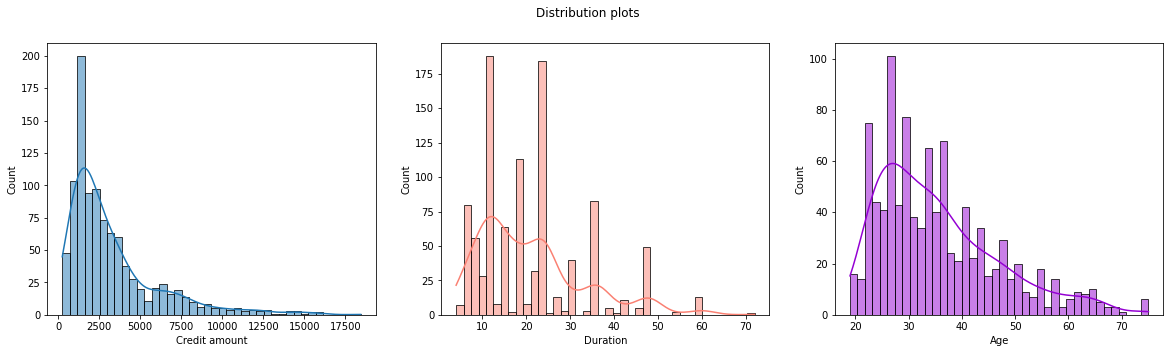

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('Distribution plots')
sns.histplot(df['Credit amount'], bins=40, ax=ax[0], kde=True);
sns.histplot(df['Duration'], bins=40, ax=ax[1], color='salmon', kde=True);
sns.histplot(df['Age'], bins=40, ax=ax[2], color='darkviolet', kde=True);

## Multivariate Analysis

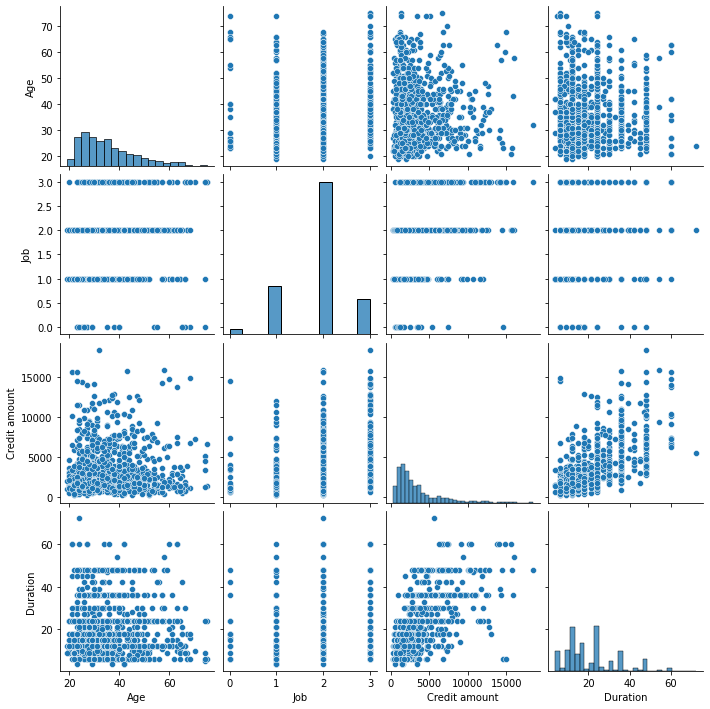

In [ ]:
sns.pairplot(df)

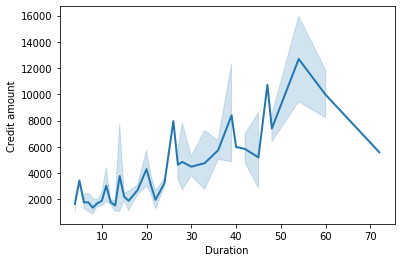

In [ ]:
sns.lineplot(data=df, x='Duration', y='Credit amount', lw=2);

Text(0.5, 0, 'Age')

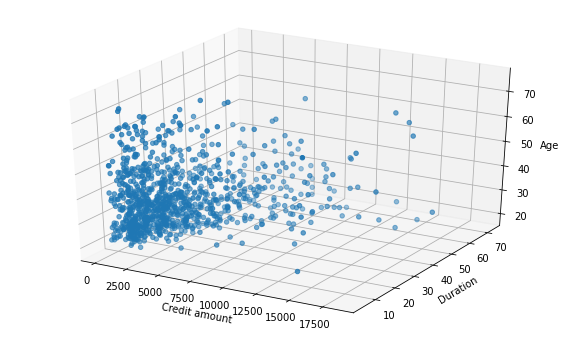

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Credit amount"], df["Duration"], df["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

In [ ]:
pd.crosstab(df['Job'], df['Purpose'])

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Job,,,,,,,,
0,2,12,1,1,1,2,2,1
1,20,66,1,15,33,57,7,1
2,60,190,10,35,126,195,13,1
3,15,69,0,8,21,26,0,9


In [ ]:
SC =df.loc[:,['Purpose','Credit amount','Job']]
fig = px.box(SC, x="Purpose", y="Credit amount", color="Job")
fig.update_layout(
    title={
          'text':"Purpose Vs Credit Amount",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis_title="Purpose",
    yaxis_title="Credit amount",
   
)
fig.show()

# Data Transformation

In [ ]:
from sklearn.preprocessing import StandardScaler

## Get dummies

In [ ]:
scaler = StandardScaler()
num_df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical]), columns=df[numerical].columns)
df_scaled=pd.concat([num_df_scaled, df[categorical]], axis=1)

df_dummied=pd.get_dummies(df_scaled)
df_dummied=pd.DataFrame(df_dummied, columns=df_dummied.columns)

## FAMD

In [ ]:
famd = prince.FAMD(n_components=2)
df_famd = famd.fit_transform(df)

## PCA+MCA

In [ ]:
df_pca= prince.PCA(n_components=2).fit_transform(df[numerical])
df_mca=prince.MCA(n_components=2).fit_transform(df[categorical])

df_mca=df_mca.rename(columns={0: 2, 1: 3})

df_pca_mca=pd.concat([df_pca,df_mca],axis=1)


# Elbow Method

## Get dummies

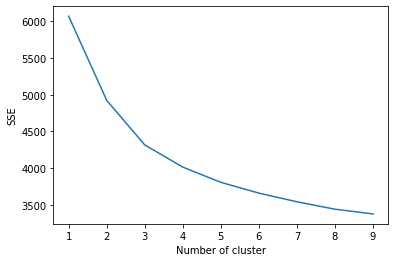

In [ ]:
elbow_method(df_dummied)

## FAMD

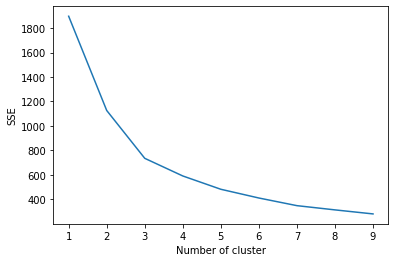

In [ ]:
elbow_method(df_famd)

## PCA+MCA

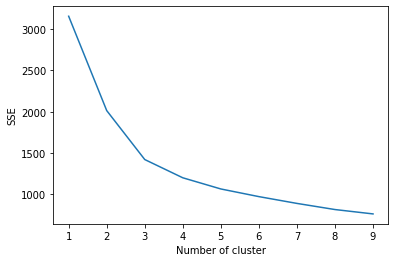

In [ ]:
elbow_method(df_pca_mca)

# Clustering | KMeans 

On choisit 4 clusters pour chaque méthode.

## Get dummies

In [ ]:
kmeans_dummies = KMeans(n_clusters=4).fit(df_dummied)
clusters_dummies = kmeans_dummies.predict(df_dummied)

df_dummied_kmeans=s=df.assign(Cluster=clusters_dummies)
df_dummied_kmeans.groupby(['Cluster']).agg(['mean']).reset_index()

,Cluster,Age,Credit amount,Duration
,,mean,mean,mean
0,0,52.705000,2334.950000,15.965000
1,1,35.360465,7985.558140,39.755814
2,2,27.950673,2130.470852,16.753363
3,3,31.333333,2359.646914,17.619753


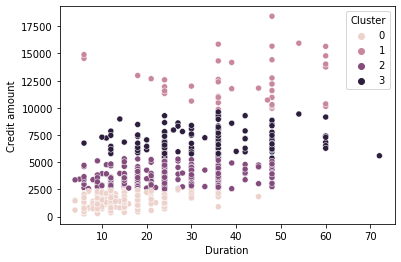

In [ ]:
sns.scatterplot(data=df_dummied_kmeans, x="Duration", y="Credit amount", hue="Cluster")


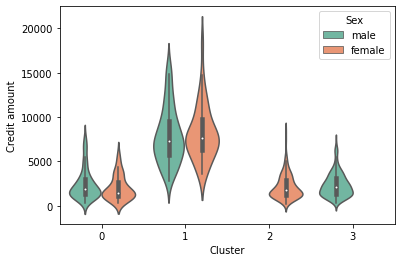

In [ ]:
ax = sns.violinplot(x="Cluster", y="Credit amount", hue='Sex' , data=df_dummied_kmeans, palette="Set2")

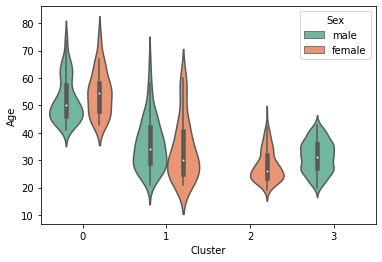

In [ ]:
ax = sns.violinplot(x="Cluster", y="Age", hue='Sex' , data=df_dummied_kmeans, palette="Set2")

In [ ]:
pd.crosstab(df_dummied_kmeans.Job, df_dummied_kmeans.Cluster)

Cluster,0,1,2,3
Job,,,,
0,15,1,4,2
1,138,4,47,11
2,345,16,192,77
3,46,21,41,40


In [ ]:
fig = px.histogram(df_dummied_kmeans, x="Purpose", color="Cluster")
fig.update_layout(
    title={
          'text':"Purpose",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
   
)
fig.show()

## FAMD

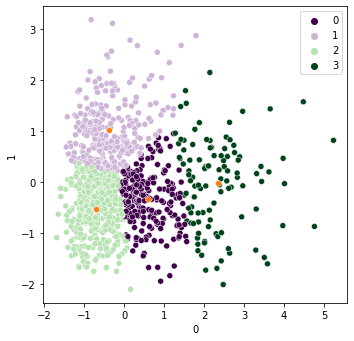

In [ ]:
kmeans_famd = KMeans(n_clusters=4).fit(df_famd)
clusters_famd = kmeans_famd.predict(df_famd)

plt.figure(figsize=(12, 12))
plt.subplot(221)
sns.scatterplot(x=df_famd[0], y=df_famd[1], hue=clusters_famd, palette='PRGn')

C = kmeans_famd.cluster_centers_
sns.scatterplot(x=C[:, 0], y=C[:, 1])

In [ ]:
df_famd_kmeans=s=df.assign(Cluster=clusters_famd)
df_famd_kmeans.groupby(['Cluster']).agg(['mean']).reset_index()

,Cluster,Age,Credit amount,Duration
,,mean,mean,mean
0,0,32.443946,4409.663677,29.327354
1,1,47.678700,2080.693141,14.469314
2,2,28.144670,1859.956853,15.053299
3,3,37.877358,9233.283019,41.735849


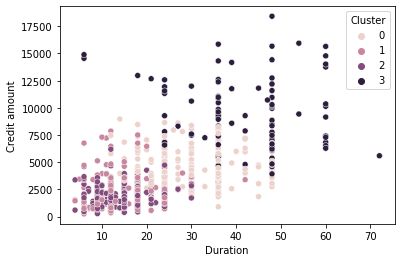

In [ ]:
sns.scatterplot(data=df_famd_kmeans, x="Duration", y="Credit amount", hue="Cluster")

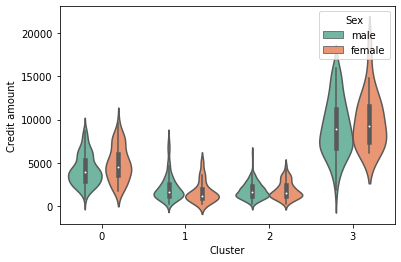

In [ ]:
ax = sns.violinplot(x="Cluster", y="Credit amount", hue='Sex' , data=df_famd_kmeans, palette="Set2")

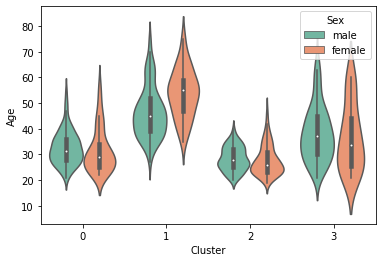

In [ ]:
ax = sns.violinplot(x="Cluster", y="Age", hue='Sex' , data=df_famd_kmeans, palette="Set2")

In [ ]:
fig = px.histogram(df_famd_kmeans, x="Purpose", color="Cluster")
fig.update_layout(
    title={
          'text':"Purpose",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
   
)
fig.show()

## PCA+MCA

K-Means


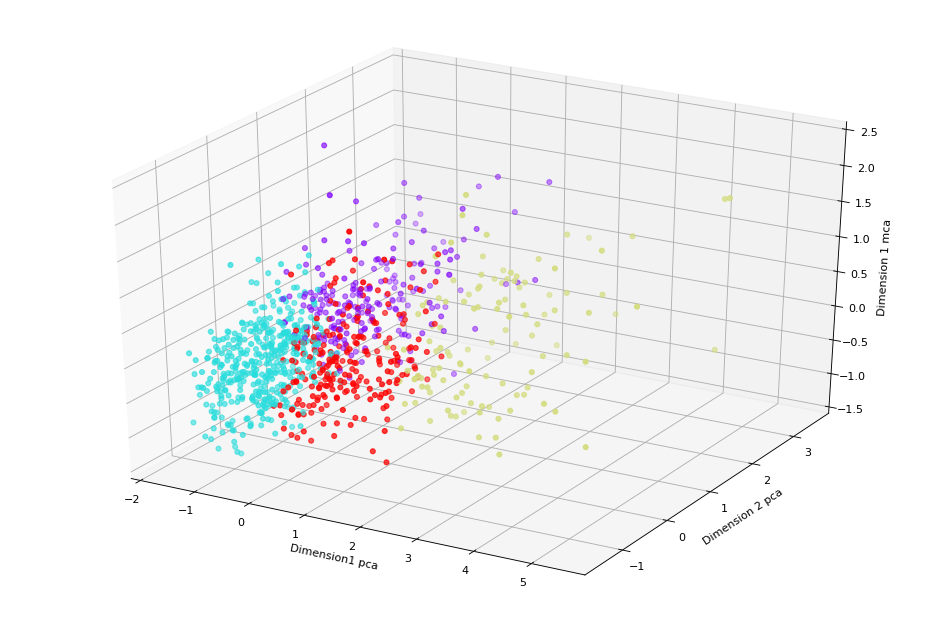

In [ ]:
kmeans_pca_mca = KMeans(n_clusters=4).fit(df_pca_mca)

clusters_pca_mca = kmeans_pca_mca.predict(df_pca_mca)

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_pca_mca[0],df_pca_mca[1],df_pca_mca[2],c=clusters_pca_mca, cmap='rainbow')

xLabel = ax.set_xlabel('Dimension1 pca', linespacing=3.2)
yLabel = ax.set_ylabel('Dimension 2 pca', linespacing=3.1)
zLabel = ax.set_zlabel('Dimension 1 mca', linespacing=3.4)
print("K-Means")

In [ ]:
df_pca_mca_kmeans=df.assign(Cluster=clusters_pca_mca)
df_pca_mca_kmeans.groupby(['Cluster']).agg(['mean']).reset_index()

,Cluster,Age,Credit amount,Duration
,,mean,mean,mean
0,0,52.320388,2282.694175,15.781553
1,1,29.649886,1693.318078,13.839817
2,2,37.043103,9063.905172,42.741379
3,3,31.178423,4189.336100,27.576763


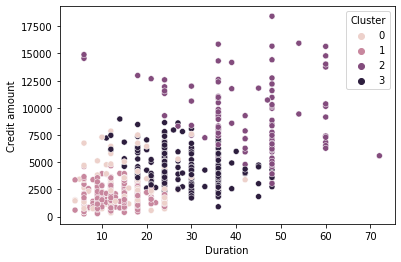

In [ ]:
sns.scatterplot(data=df_pca_mca_kmeans, x="Duration", y="Credit amount", hue="Cluster")

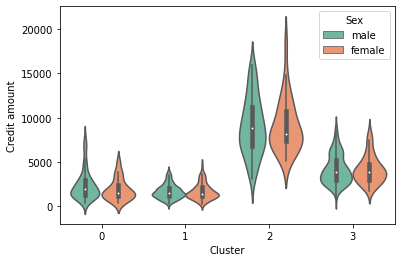

In [ ]:
ax = sns.violinplot(x="Cluster", y="Credit amount", hue='Sex' , data=df_pca_mca_kmeans, palette="Set2")

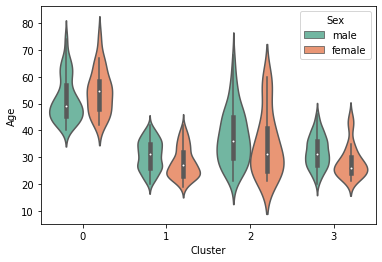

In [ ]:
ax = sns.violinplot(x="Cluster", y="Age", hue='Sex' , data=df_pca_mca_kmeans, palette="Set2")

In [ ]:
fig = px.histogram(df_pca_mca_kmeans, x="Purpose", color="Cluster")
fig.update_layout(
    title={
          'text':"Purpose",
        'y':.95,
        'x':.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
   
)
fig.show()